In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets , models , layers


In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Check the shape of the data
print(f"x_train shape: {x_train.shape}")  # (50000, 32, 32, 3)
print(f"y_train shape: {y_train.shape}")  # (50000, 1)
print(f"x_test shape: {x_test.shape}")    # (10000, 32, 32, 3)
print(f"y_test shape: {y_test.shape}")    # (10000, 1)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [ ]:
# Normalize the pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# Get the unique labels
unique_classes, class_counts = np.unique(np.argmax(y_train, axis=1), return_counts=True)

# Print the classes and their counts
print(f"Unique classes: {unique_classes}")
print(f"Class distribution in training set: {dict(zip(unique_classes, class_counts))}")

Unique classes: [0 1 2 3 4 5 6 7 8 9]
Class distribution in training set: {0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000}


In [ ]:
# Create an ImageDataGenerator object for data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

# Compute statistics for the training data
datagen.fit(x_train)

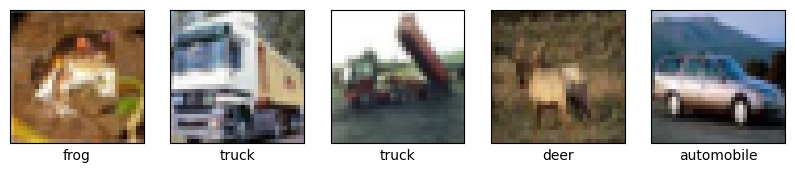

In [ ]:
# Plot the first 5 images from the training dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.show()

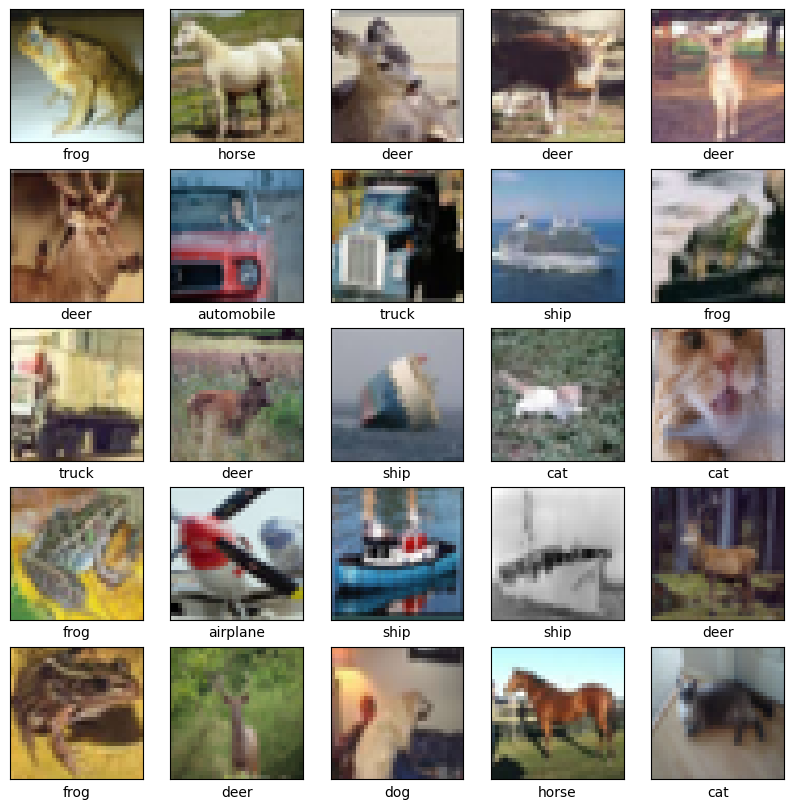

In [ ]:
# Visualize 25 random images with labels
plt.figure(figsize=(10, 10))
for i in range(25):
    # Randomly select an image
    index = np.random.randint(0, len(x_train))

    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[index])
    plt.xlabel(class_names[np.argmax(y_train[index])])
plt.show()

In [ ]:
# Build the CNN model
model = models.Sequential()

# Input layer
model.add(layers.Input(shape=(32, 32, 3)))

# First convolutional block
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

# Second convolutional block
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))

# Third convolutional block
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

# Flatten and dense layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

# Output layer
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,253,834 (12.41 MB)

 Trainable params: 3,251,018 (12.40 MB)

 Non-trainable params: 2,816 (11.00 KB)

In [ ]:
# Step 5: Train the Model
epochs = 10
batch_size = 64  # Standard batch size

# Train the model using the data generator without early stopping
history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 1211s 2s/step - accuracy: 0.3258 - loss: 2.1785 - val_accuracy: 0.4942 - val_loss: 1.4357
Epoch 2/10
  1/781 ━━━━━━━━━━━━━━━━━━━━ 17:16 1s/step - accuracy: 0.5156 - loss: 1.3300

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


781/781 ━━━━━━━━━━━━━━━━━━━━ 57s 71ms/step - accuracy: 0.5156 - loss: 1.3300 - val_accuracy: 0.5000 - val_loss: 1.4282
Epoch 3/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 1221s 2s/step - accuracy: 0.5595 - loss: 1.2325 - val_accuracy: 0.6198 - val_loss: 1.0857
Epoch 4/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 57s 72ms/step - accuracy: 0.7031 - loss: 1.0134 - val_accuracy: 0.6326 - val_loss: 1.0570
Epoch 5/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 1220s 2s/step - accuracy: 0.6543 - loss: 0.9809 - val_accuracy: 0.6901 - val_loss: 0.9044
Epoch 6/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 59s 73ms/step - accuracy: 0.7969 - loss: 0.6148 - val_accuracy: 0.6814 - val_loss: 0.9299
Epoch 7/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 1222s 2s/step - accuracy: 0.6910 - loss: 0.8748 - val_accuracy: 0.7158 - val_loss: 0.8558
Epoch 8/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 83s 105ms/step - accuracy: 0.7812 - loss: 0.6490 - val_accuracy: 0.7034 - val_loss: 0.9022
Epoch 9/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 1201s 2s/step - accuracy: 0.7232 - loss: 0.7933 - val_accura

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_accuracy:.4f}')


313/313 - 56s - 178ms/step - accuracy: 0.7548 - loss: 0.7392
Test accuracy: 0.7548


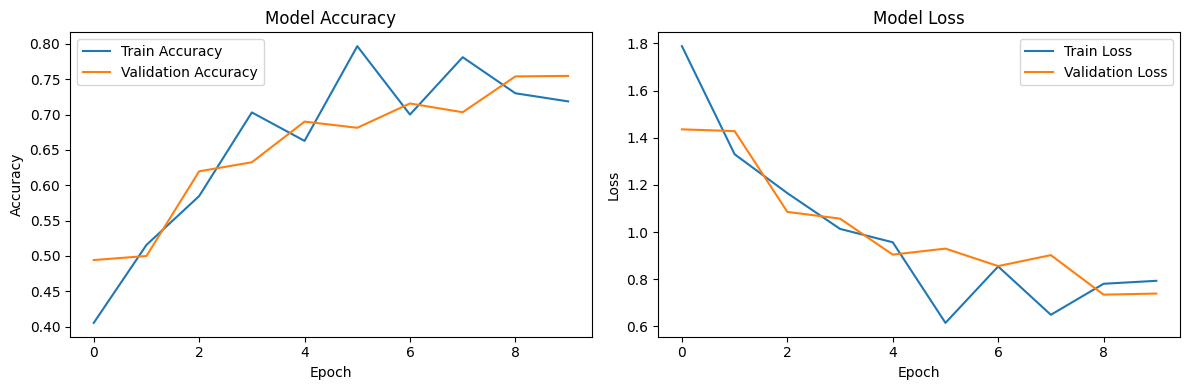

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
#Different Architectures

In [ ]:
# Model 1: Increase Number of Layers
def build_model_1():
    model = models.Sequential()
    model.add(layers.Input(shape=(32, 32, 3)))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    # Additional layers
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))

    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train Model 1
model_1 = build_model_1()
history_model_1 = model_1.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                               epochs=epochs,
                               validation_data=(x_test, y_test),
                               steps_per_epoch=x_train.shape[0] // batch_size)

# Evaluate Model 1
test_loss_model_1, test_accuracy_model_1 = model_1.evaluate(x_test, y_test, verbose=2)
print(f'Model 1 Test Accuracy: {test_accuracy_model_1:.4f}')


Epoch 1/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 1207s 2s/step - accuracy: 0.3337 - loss: 2.1595 - val_accuracy: 0.5560 - val_loss: 1.2539
Epoch 2/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 83s 105ms/step - accuracy: 0.5312 - loss: 1.2808 - val_accuracy: 0.5493 - val_loss: 1.2712
Epoch 3/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 1254s 2s/step - accuracy: 0.5566 - loss: 1.2437 - val_accuracy: 0.5920 - val_loss: 1.2248
Epoch 4/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 57s 72ms/step - accuracy: 0.6719 - loss: 0.9153 - val_accuracy: 0.5834 - val_loss: 1.2575
Epoch 5/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 1199s 2s/step - accuracy: 0.6549 - loss: 0.9786 - val_accuracy: 0.6307 - val_loss: 1.1848
Epoch 6/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 59s 74ms/step - accuracy: 0.6562 - loss: 0.9076 - val_accuracy: 0.6410 - val_loss: 1.1376
Epoch 7/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 1198s 2s/step - accuracy: 0.6921 - loss: 0.8716 - val_accuracy: 0.7342 - val_loss: 0.8001
Epoch 8/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 57s 72ms/step - accuracy: 0.6250 - loss: 1.0090 -

In [ ]:
# Model 2: Different Filter Sizes
def build_model_2():
    model = models.Sequential()
    model.add(layers.Input(shape=(32, 32, 3)))
    model.add(layers.Conv2D(32, (5, 5), padding='same', activation='relu'))  # Larger filter
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(64, (5, 5), padding='same', activation='relu'))  # Larger filter
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.Conv2D(128, (5, 5), padding='same', activation='relu'))  # Larger filter
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))

    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train Model 2
model_2 = build_model_2()
history_model_2 = model_2.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                               epochs=epochs,
                               validation_data=(x_test, y_test),
                               steps_per_epoch=x_train.shape[0] // batch_size)

# Evaluate Model 2
test_loss_model_2, test_accuracy_model_2 = model_2.evaluate(x_test, y_test, verbose=2)
print(f'Model 2 Test Accuracy: {test_accuracy_model_2:.4f}')


Epoch 1/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 320s 405ms/step - accuracy: 0.3071 - loss: 2.2777 - val_accuracy: 0.4191 - val_loss: 1.7753
Epoch 2/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.4531 - loss: 1.6262 - val_accuracy: 0.4287 - val_loss: 1.6900
Epoch 3/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 366s 404ms/step - accuracy: 0.4703 - loss: 1.4717 - val_accuracy: 0.4560 - val_loss: 1.6271
Epoch 4/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.3906 - loss: 1.5112 - val_accuracy: 0.4530 - val_loss: 1.6567
Epoch 5/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 313s 401ms/step - accuracy: 0.5341 - loss: 1.2976 - val_accuracy: 0.5668 - val_loss: 1.2473
Epoch 6/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.6250 - loss: 1.0435 - val_accuracy: 0.5662 - val_loss: 1.2484
Epoch 7/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 370s 404ms/step - accuracy: 0.5694 - loss: 1.2061 - val_accuracy: 0.6574 - val_loss: 0.9840
Epoch 8/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.5625 - loss: 1

In [ ]:
# Model 3: Different Activation Functions
def build_model_3():
    model = models.Sequential()
    model.add(layers.Input(shape=(32, 32, 3)))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='elu'))  # ELU activation
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='elu'))  # ELU activation
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='elu'))  # ELU activation
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))

    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='elu'))  # ELU activation
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
# Train Model 3
model_3 = build_model_3()
history_model_3 = model_3.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                               epochs=epochs,
                               validation_data=(x_test, y_test),
                               steps_per_epoch=x_train.shape[0] // batch_size)

# Evaluate Model 3
test_loss_model_3, test_accuracy_model_3 = model_3.evaluate(x_test, y_test, verbose=2)
print(f'Model 3 Test Accuracy: {test_accuracy_model_3:.4f}')


Epoch 1/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 444s 563ms/step - accuracy: 0.3327 - loss: 2.1806 - val_accuracy: 0.5254 - val_loss: 1.4114
Epoch 2/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.5938 - loss: 1.3547 - val_accuracy: 0.5467 - val_loss: 1.2856
Epoch 3/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 436s 558ms/step - accuracy: 0.5073 - loss: 1.3772 - val_accuracy: 0.5798 - val_loss: 1.2322
Epoch 4/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.5938 - loss: 1.1611 - val_accuracy: 0.6016 - val_loss: 1.1484
Epoch 5/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 436s 557ms/step - accuracy: 0.5738 - loss: 1.1883 - val_accuracy: 0.5812 - val_loss: 1.2966
Epoch 6/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.6875 - loss: 0.9217 - val_accuracy: 0.5710 - val_loss: 1.3962
Epoch 7/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 435s 557ms/step - accuracy: 0.6086 - loss: 1.1022 - val_accuracy: 0.6660 - val_loss: 0.9926
Epoch 8/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.5469 - loss: 1

In [ ]:
# Compare Accuracies
print(f'Base Model Test Accuracy: {test_accuracy:.4f}')
print(f'Model 1 Test Accuracy: {test_accuracy_model_1:.4f}')
print(f'Model 2 Test Accuracy: {test_accuracy_model_2:.4f}')
print(f'Model 3 Test Accuracy: {test_accuracy_model_3:.4f}')

Base Model Test Accuracy: 0.7548
Model 1 Test Accuracy: 0.7500
Model 2 Test Accuracy: 0.5399
Model 3 Test Accuracy: 0.7139


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have a test set (X_test, y_test) and models already loaded
# y_test: True labels
# model, model_1, model_2, model_3: Pre-trained models

# Dictionary to store all model metrics
metrics = {
    'model': {},
    'model_1': {},
    'model_2': {},
    'model_3': {}
}

# List of models and their names
model_list = {
    'model': model,
    'model_1': model_1,
    'model_2': model_2,
    'model_3': model_3
}

# Loop over each model, generate predictions, and calculate metrics
for model_name, model_obj in model_list.items():
    y_pred = model_obj.predict(X_test)  # Get predictions from each model
    metrics[model_name]['Accuracy'] = accuracy_score(y_test, y_pred)
    metrics[model_name]['Precision'] = precision_score(y_test, y_pred, average='weighted')
    metrics[model_name]['Recall'] = recall_score(y_test, y_pred, average='weighted')
    metrics[model_name]['F1 Score'] = f1_score(y_test, y_pred, average='weighted')
    metrics[model_name]['Confusion Matrix'] = confusion_matrix(y_test, y_pred)

# Display the results
for model_name in metrics:
    print(f"\nMetrics for {model_name}:")
    print(f"Accuracy: {metrics[model_name]['Accuracy']:.4f}")
    print(f"Precision: {metrics[model_name]['Precision']:.4f}")
    print(f"Recall: {metrics[model_name]['Recall']:.4f}")
    print(f"F1 Score: {metrics[model_name]['F1 Score']:.4f}")
    print(f"Confusion Matrix:\n{metrics[model_name]['Confusion Matrix']}")


NameError: name 'model' is not defined